In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Linear regression

In [2]:
train_data = pd.read_csv('../data/train_final.csv')
train_data = train_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
train_X = train_data.drop(columns=['IMDB Score'])
print(np.cov(train_data['IMDB Score']))

1.3749116441929752


In [4]:
# valid_data = pd.read_csv('../data/valid_final.csv')
# valid_data = valid_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
# valid_X = valid_data.drop(columns=['IMDB Score'])
# print(np.cov(valid_data['IMDB Score']))

1.3261752115079182


In [3]:
test_data = pd.read_csv('../data/test_final.csv')
test_data = test_data.drop(columns = ['Genre', 'actors', 'director', 'companies', 'overview'])
test_X = test_data.drop(columns=['IMDB Score'])
print(np.cov(test_data['IMDB Score']))

1.3698599720979419


In [4]:
# linearRegression = GridSearchCV(estimator=LinearRegression(), param_grid={"intercept": [True, False]}, scoring=metrika , cv=30) ?
linearRegression = LinearRegression().fit(train_X, train_data['IMDB Score'])

In [15]:
print('train R^2: ', linearRegression.score(train_X, train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(linearRegression.predict(train_X), train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(linearRegression.predict(train_X), train_data['IMDB Score']))

# print('valid R^2: ', linearRegression.score(valid_X, valid_data['IMDB Score']))
# print('valid MSE: ', mean_squared_error(linearRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', linearRegression.score(test_X, test_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(linearRegression.predict(test_X), test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(linearRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.5469532634174328
train MAE:  0.6031675024259086
train MSE:  0.6228400675303715
test R^2:  0.3615194589066031
train MAE:  0.7248295216204385
test MSE:  0.874435134094227


# Ridge regression

In [16]:
ridgeRegression = Ridge(alpha = 10, random_state = 0).fit(train_X, train_data['IMDB Score'])

print('Train R^2: ', ridgeRegression.score(train_X, train_data['IMDB Score']))
print('Train MAE: ', mean_absolute_error(ridgeRegression.predict(train_X), train_data['IMDB Score']))
print('Train MSE: ', mean_squared_error(ridgeRegression.predict(train_X), train_data['IMDB Score']))

# print('Valid R^2: ', ridgeRegression.score(valid_X, valid_data['IMDB Score']))
# print('Valid MSE: ', mean_squared_error(ridgeRegression.predict(valid_X), valid_data['IMDB Score']))

print('Test R^2: ', ridgeRegression.score(test_X, test_data['IMDB Score']))
print('Test MAE: ', mean_absolute_error(ridgeRegression.predict(test_X), test_data['IMDB Score']))
print('Test MSE: ', mean_squared_error(ridgeRegression.predict(test_X), test_data['IMDB Score']))

/home/shone/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.97912e-19): result may not be accurate.
  overwrite_a=True).T


Train R^2:  0.48793680117999016
Train MAE:  0.6442418633803632
Train MSE:  0.7039747813628666
Test R^2:  0.4009709875454338
Test MAE:  0.6959039923099868
Test MSE:  0.8204040391505335


# Lasso (Least Absolute Shrinkage and Selection Operator)

In [17]:
lassoRegression = Lasso(alpha=0.01, random_state=0).fit(train_X, train_data['IMDB Score'])

In [18]:
print('train R^2: ', lassoRegression.score(train_X, train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(lassoRegression.predict(train_X), train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(lassoRegression.predict(train_X), train_data['IMDB Score']))

# print('valid R^2: ', lassoRegression.score(valid_X, valid_data['IMDB Score']))
# print('valid MSE: ', mean_squared_error(lassoRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', lassoRegression.score(test_X, test_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(lassoRegression.predict(test_X), test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(lassoRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.3067452704795627
train MAE:  0.7552564534961796
train MSE:  0.9530734639152751
test R^2:  0.304028552361731
test MAE:  0.752210485497123
test MSE:  0.953172175144332


# Random forest regression

In [19]:
RandomForestReg = RandomForestRegressor(n_estimators=100, max_depth=32).fit(train_X, train_data['IMDB Score'])

In [11]:
print('train R^2: ', RandomForestReg.score(train_X, train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(RandomForestReg.predict(train_X), train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(RandomForestReg.predict(train_X), train_data['IMDB Score']))

# print('valid R^2: ', RandomForestReg.score(valid_X, valid_data['IMDB Score']))
# print('valid MSE: ', mean_squared_error(RandomForestReg.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', RandomForestReg.score(test_X, test_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(RandomForestReg.predict(test_X), test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(RandomForestReg.predict(test_X), test_data['IMDB Score']))

train R^2:  0.7755670813417613
train MSE:  0.3085461232268692
valid R^2:  0.3377382144738258
valid MSE:  0.8778858571269885
test R^2:  0.43148151216301056
test MSE:  0.8035864497039499


Index(['runtime', 'horror', 'documentary', 'budget', 'drama', 'action',
       'animation', 'sci-fi', 'thriller', 'comedy', 'crime', 'the asylum',
       'adventure', 'fantasy', 'mystery', 'short', 'biography', 'family',
       'romance', 'woody allen'],
      dtype='object')


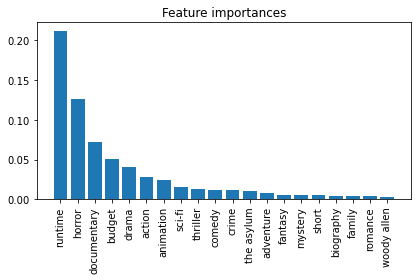

In [12]:
featureImportances = np.argsort(RandomForestReg.feature_importances_)[::-1]
print(train_X.columns[featureImportances[:20]])
plt.figure()
plt.title("Feature importances")
plt.bar(range(20),RandomForestReg.feature_importances_[featureImportances[:20]])
plt.xticks(range(20), train_X.columns[featureImportances[:20]], rotation='vertical')
plt.tight_layout()
plt.savefig('../data/randomforest.png')
plt.show()

# XGBoost (eXtreme Gradient Boosting)

In [13]:
xgbRegression = xgb.XGBRegressor(objective='reg:squarederror').fit(train_X, train_data['IMDB Score'])

In [14]:
print('train R^2: ', xgbRegression.score(train_X, train_data['IMDB Score']))
print('train MAE: ', mean_absolute_error(xgbRegression.predict(train_X), train_data['IMDB Score']))
print('train MSE: ', mean_squared_error(xgbRegression.predict(train_X), train_data['IMDB Score']))

# print('valid R^2: ', xgbRegression.score(valid_X, valid_data['IMDB Score']))
# print('valid MSE: ', mean_squared_error(xgbRegression.predict(valid_X), valid_data['IMDB Score']))

print('test R^2: ', xgbRegression.score(test_X, test_data['IMDB Score']))
print('test MAE: ', mean_absolute_error(xgbRegression.predict(test_X), test_data['IMDB Score']))
print('test MSE: ', mean_squared_error(xgbRegression.predict(test_X), test_data['IMDB Score']))

train R^2:  0.5674401301819887
train MSE:  0.5946751113596823
valid R^2:  0.40346385516434913
valid MSE:  0.79076077808143
test R^2:  0.4656081614647255
test MSE:  0.7553492972817053
